# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

#### Created by Silvia Huang, CFFS Data Analyst
***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import pdpipe as pdp
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest
pd.set_option('mode.chained_assignment', None)

C:\Users\smvan\anaconda3\lib\site-packages\pdpipe\col_generation.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# Set the root path, change the the current working directory into the project folder
path = "C:/Users/smvan/CFFS-S23/CFFS-22-23"
# path = os.getcwd()
os.chdir(path)

In [4]:
# Enable reading data table in the scrolling window if you prefer
pd.set_option("display.max_rows", None, "display.max_columns", None)

***
## Import Cleaned Datasets

In [5]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [6]:
Items.head()

ItemId                    Description  CaseQty CaseUOM  PakQty PakUOM  \
0   I-4507                        BANANA      40.0      lb     2.0  piece   
1  I-13635                    CABBAGE UBC      1.0      lb     1.0     lb   
2   I-4574  CARROTS SHREDDED 1/8 (COARSE)      5.0      lb     1.0     lb   
3   I-7953           CHEESE BLUE CRUMBLED      2.0   BLOCK     2.0     Kg   
4  I-14181         CHEESE CHED SLICED 14G     24.0     bag    18.0  slice   

  InventoryGroup  
0        PRODUCE  
1        PRODUCE  
2        PRODUCE  
3          DAIRY  
4          DAIRY

In [7]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [8]:
Ingredients.head()

IngredientId     Qty Uom  Conversion  InvFactor   Recipe
0       I-3643   225.0   g    0.001000     0.1837  P-18907
1       I-6026  1000.0   g    1.000000     0.8163  P-18907
2       I-4341     1.0  CT    1.000000     0.0182  P-26514
3       I-1813    15.0  ml    0.033814     2.0000  P-36092
4       I-2254     2.0   L    1.000000     0.2667  P-36092

In [9]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [10]:
Preps.head()
Preps.shape

(766, 7)

In [11]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [12]:
Products.head()

ProdId               Description SalesGroup
0  R-44780  ADD|Condiment House Made    ADD ONS
1  R-13180              ADD|Crackers    ADD ONS
2  R-44764      GRL|Add|Cheese|Ratio    ADD ONS
3  R-53406           GRL|Add|Ham|1oz    ADD ONS
4  R-51989          GRL|Add|Mushroom    ADD ONS

In [13]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [14]:
Conversions

ConversionId   Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
0            NaN     1.000000          1.0000            XXX        1.0000   
1            NaN     0.877193          1.0000          1.14L        1.1400   
2            NaN     0.666667          1.0000           1.5L        1.5000   
3            NaN     0.571429          1.0000         1.75 L        1.7500   
4            NaN     0.500000          1.0000             2L        2.0000   
5            NaN     0.250000          1.0000             4L        4.0000   
6            NaN     0.083333          1.0000           FOOT       12.0000   
7            NaN     0.062500          1.0000            16L       16.0000   
8            NaN     0.059172          1.0000         1/2LTR       16.9000   
9            NaN     0.039370          1.0000          750ML       25.4000   
10           NaN     0.033333          1.0000        KEG 30L       30.0000   
11           NaN     0.025974          1.0000         1140ml       38.5000   
12           NaN     0.025000          1.0000        full in       40.0000   
13           NaN     0.020000          1.0000        KEG 50L       50.0000   
14           NaN     0.017065          1.0000        KEG 59L       58.6000   
15           NaN     0.016667          1.0000           HOUR       60.0000   
16           NaN     0.002000          1.0000          500ML      500.0000   
17           NaN     0.001538          1.0000          650ML      650.0000   
18           NaN     0.001515          1.0000          660ML      660.0000   
19           NaN     0.001429          1.0000          700ML      700.0000   
20           NaN     0.001408          1.0000          710ml      710.0000   
21           NaN     0.001333          1.0000          750ML      750.0000   
22           NaN     0.000592          1.0000         keg50L     1690.0000   
23           NaN     0.000504          1.0000         keg59L     1984.0000   
24           NaN     2.000000          2.0000            cup        1.0000   
25           NaN     2.000000          2.0000             pt        1.0000   
26           NaN     2.000000          2.0000           Tbsp        1.0000   
27           NaN     3.000000          3.0000            tsp        1.0000   
28           NaN     4.000000          4.0000             qt        1.0000   
29           NaN     8.000000          8.0000          fl oz        1.0000   
30           NaN    16.000000         16.0000             oz        1.0000   
31           NaN    28.349500         28.3495              g        1.0000   
32           NaN    29.573500         29.5735             ml        1.0000   
33           NaN    35.211268        100.0000          fl oz        2.8400   
34           NaN  1000.000000       1000.0000              g        1.0000   
35           NaN  1000.000000       1000.0000             mg        1.0000   
36           NaN  1000.000000       1000.0000             ml        1.0000   
37        I-1813     0.032787          1.0000          fl oz       30.5000   
38        I-1813     0.004098          1.0000            cup      244.0000   
39        I-2254     0.083333          1.0000           Tbsp       12.0000   
40        I-2254     0.004348          1.0000            cup      230.0000   
41        I-3237     0.166667          1.0000            pak        6.0000   
42        I-3321     0.002950          1.0000            cup      339.0000   
43        I-3348     0.066667          1.0000           Tbsp       15.0000   
44        I-3370     0.004016          1.0000            cup      249.0000   
45        I-3388     0.222222          1.0000            tsp        4.5000   
46        I-3388     0.071429          1.0000           Tbsp       14.0000   
47        I-3388     0.004587          1.0000            cup      218.0000   
48        I-3623     0.555556          1.0000            tsp        1.8000   
49        I-3623     0.188679          1.0000           Tbsp        5.3000   
50        I-3642     0.144

In [15]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
km^2 land use/kg product                                  float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [16]:
mapping

ItemId  CategoryID                     Description    CaseQty  \
0       I-57545         1.0         CHUCK FLAT BONELESS FZN      3.300   
1       I-10869         1.0             BEEF STIRFRY COV FR      5.000   
2        I-7064         1.0           BEEF OUTSIDE FLAT AAA      1.000   
3       I-37005         1.0                  BEEF MEATBALLS      4.540   
4       I-37002         1.0        BEEF INSIDE ROUND SHAVED      9.000   
5        I-3876         1.0           BEEF CHUCK GROUND AAA      1.000   
6       I-34065         1.0           BEEF BONES KNUCKLE FZ      1.000   
7       I-11661         1.0           BEEF STEW 3/4" FROZEN      5.000   
8        I-3837         1.0          BEEF STEW DICED 3/4"FR      1.000   
9       I-43648         1.0       BRISKET BEEF CORN SMKD FR      4.500   
10       I-3838         1.0      BEEF BRISKET BNLS 3/4" AAA      1.000   
11      I-49128         1.0       HOT DOG BEEF G/FREE 6 INC     10.000   
12      I-17055         1.0   BEEF RIB BRAISING 3 BONE 1/4"      1.000   
13      I-10775         1.0       HOT DOG BEEF 8IN 4/LB FZN     10.000   
14      I-17671         1.0    BEEF RIB-EYE SHAVED 1.5MM FZ      1.000   
15      I-20879         1.0       SOUVLAKI BEEF 75G SKEWERS      1.000   
16       I-3842         1.0          BEEF INSIDE ROUND AAA       1.000   
17       I-3846         1.0        BEEF LEAN GRD COMMERCIAL      5.000   
18       I-3867         1.0        BEEF STIRFRY MEAT FZ 1ST      5.000   
19       I-9454         1.0         BEEF BACK RIB UT COV FZ      1.000   
20      I-26667         1.0          BURGER PRIME RIB  6OZ      30.000   
21      I-28697         1.0               BURGER QUINOA YAM     60.000   
22      I-47440         1.0             JAMAICAN PATTY MILD     36.000   
23      I-47441         1.0            JAMAICAN PATTY SPICY     36.000   
24      I-13425         2.0    LAMB LEG BNLS COMMODITY AUST      1.000   
25       I-3843         2.0                      LAMB GRDFR      1.000   
26      I-43653         2.0                  LAMB STEW 3/4"     25.000   
27      I-13303         3.0            SAUSAGE PATTIES PORK      5.000   
28      I-11922         3.0       SAUSAGE MEAT CHORIZO FRZN      5.000   
29      I-50575         3.0    SAUSAGE ITAL CRUMBLE CKD FRZ      2.000   
30       I-2317         3.0    SAUSAGE FARMER DOUBLE SMOKED      1.000   
31      I-17667         3.0            SAUSAGE CHORIZO MEAT      5.000   
32       I-2333         3.0   PROSCIUTTO SLICED SAN DANIELE      1.000   
33       I-6869         3.0  PROSCIUTTO COTTO MASTRO SLICED      1.000   
34       I-3856         3.0      PORK LOIN BNLS S/CUT COVFR      1.000   
35       I-3887         3.0       PORK GROUND BRITCO PER KG      1.000   
36       I-3855         3.0                   PORK GRD FRZ       5.000   
37       I-3851         3.0       PORK BUTT BNLS 1/4 COV FR      1.000   
38       I-2311         3.0            HAM PROSCIUTTO BNLS       1.000   
39       I-2310         3.0                      HAM HONEY       6.000   
40       I-2306         3.0            HAM BLACK FOREST slc      6.000   
41       I-8260         3.0       CAPICOLLO EXT HOT CAPOLLA      1.000   
42      I-27410         3.0        BACON 3MM NATURALLY SMKD      5.000   
43       I-2308         3.0                 HAM CAPICOLLIFR      1.000   
44       I-2305         3.0                  BACON PANCETTA      1.000   
45      I-13423         3.0                   PORK STIR FRY      5.000   
46      I-19657         3.0               SAUSAGE ANDOUILLE      5.000   
47       I-2319         3.0         SMOKIES 5.5 CT BAVARIAN      1.000   
48      I-42350         3.0       PORK BACK RIB 1/2 RACK FZ      1.000   
49       I-3853         3.0              PORK CHOP 170G C/C     28.000   
50       I-8140         3.0            SAUSAGE CHORIZO WINE      1.000   
51      I-57497         3.0  SAUSAGE FRANKFURTER FLD ROAST      12.000   
52      I-22916         3.0             PORK BELLY SKON COV      1.000   
53      I-574

In [17]:
# Mapping.csv was created in 3_update info and mapping
check = mapping["ItemId"].duplicated().any()
check

False

In [18]:
mapping.loc[mapping["ItemId"] == 'I-62863']

ItemId  CategoryID                    Description  CaseQty CaseUOM  \
1988  I-62863        59.0  CK|G&G|HMR|Meat Ball & Pasta.      1.0      ea   

      PakQty PakUOM   InventoryGroup  \
1988     1.0     ea  PRODUCTION FOOD   

      Active Total Supply Chain Emissions (kg CO2 / kg food)  \
1988                                                0.0        

      g N lost/kg product  km^2 land use/kg product  \
1988                  0.0                       0.0   

      Freshwater Withdrawals (L/FU)  Stress-Weighted Water Use (L/FU)  
1988                            0.0                               0.0

### Unit Converter

In [19]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty ConvertToUom
0     4.92890               1            tsp       4.92890           ml
1    14.78700               1           Tbsp      14.78700           ml
2   946.35000               1             qt     946.35000           ml
3   473.17625               1             pt     473.17625           ml
4    28.34950               1             oz      28.34950            g

In [20]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

PrepId                 Description  PakQty PakUOM InventoryGroup   StdQty  \
0  P-54697             LEMON|Wedge 1/8     8.0   each           PREP     84.0   
1  P-35132  MARINATED|Lemon & Herb Chx   185.0     ea           PREP  24050.0   
2  P-51992   YIELD|Bread|Sourdough 5/8    36.0  slice            NaN   1620.0   
3  P-26234  BATCH|Roasted Garlic Bread    16.0     ea           PREP   1280.0   
4  P-26170           GRILLED|NaanBread     1.0     ea           PREP    125.0   

  StdUom  
0      g  
1      g  
2      g  
3      g  
4      g

In [21]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()


# ORIGINAL CODE BELOW:

# There was an issue where the values of Multiplier per row was not being added to the dataframe correctly

# Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
# Prep_cov.insert(1, "Multiplier", '')
# Prep_cov.columns = Conversions.columns
# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
# Prep_cov.head()


ConversionId Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
231      P-67553   0.014085            60.0           each        4260.0   
232      P-68103   0.041667            50.0           each        1200.0   
233      P-66019      0.004             4.0          piece        1000.0   
234      P-67284   0.005882           100.0           each       17000.0   
235      P-64887   0.011765           160.0           each       13600.0   

    ConvertToUom  
231            g  
232            g  
233            g  
234            g  
235            g

In [22]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

ConversionId Multiplier  ConvertFromQty ConvertFromUom  ConvertToQty  \
884      P-67553   0.014085            60.0           each        4260.0   
885      P-68103   0.041667            50.0           each        1200.0   
886      P-66019      0.004             4.0          piece        1000.0   
887      P-67284   0.005882           100.0           each       17000.0   
888      P-64887   0.011765           160.0           each       13600.0   

    ConvertToUom  
884            g  
885            g  
886            g  
887            g  
888            g

In [23]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [24]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [25]:
# Test the std_converter
std_converter(0.25,'lb')

(113.398, 'g')

In [26]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [27]:
spc_cov

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'I-1813',
 'I-1813',
 'I-2254',
 'I-2254',
 'I-3237',
 'I-3321',
 'I-3348',
 'I-3370',
 'I-3388',
 'I-3388',
 'I-3388',
 'I-3623',
 'I-3623',
 'I-3642',
 'I-3643',
 'I-3647',
 'I-3660',
 'I-3660',
 'I-4574',
 'I-4772',
 'I-4772',
 'I-4772',
 'I-5983',
 'I-5983',
 'I-14181',
 'I-2217',
 'I-2217',
 'I-3141',
 'I-3145',
 'I-3145',
 'I-3149',
 'I-3223',
 'I-3223',
 'I-3386',
 'I-3386',
 'I-3386',
 'I-3435',
 'I-3435',
 'I-3449',
 'I-3494',
 'I-3494',
 'I-3494',
 'I-3497',
 'I-3619',
 'I-3619',
 'I-3622',
 'I-3622',
 'I-3629',
 'I-3629',
 'I-3630',
 'I-3632',
 'I-3632',
 'I-3639',
 'I-3639',
 'I-3640',
 'I-3640',
 'I-3649',
 'I-3657',
 'I-3657',
 'I-3695',
 'I-3695',
 'I-3695',
 'I-3698',
 'I-3698',
 'I-3698',
 'I-3698',
 'I-4375',
 'I-4472',
 'I-4569',
 'I-4598',
 'I-459

In [28]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

(1, 'CT')

In [29]:
spc_converter('P-35132', 1, 'ea')

(130.00000000000156, 'g')

## GHG Factors Calculation for Preps

In [30]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['km^2 land use/kg product'] = 0
Preps['km^2 land use/kg product/StdUom'] = 0

In [31]:
Ingredients.head()

IngredientId     Qty Uom  Conversion  InvFactor   Recipe
0       I-3643   225.0   g    0.001000     0.1837  P-18907
1       I-6026  1000.0   g    1.000000     0.8163  P-18907
2       I-4341     1.0  CT    1.000000     0.0182  P-26514
3       I-1813    15.0  ml    0.033814     2.0000  P-36092
4       I-2254     2.0   L    1.000000     0.2667  P-36092

In [32]:
Preps.loc[Preps["PrepId"] == "P-67984"]

Empty DataFrame
Columns: [PrepId, Description, PakQty, PakUOM, InventoryGroup, StdQty, StdUom, GHG Emission (g), GHG Emission(g)/StdUom, N lost (g), N lost (g)/StdUom, Freshwater Withdrawals (ml), Freshwater Withdrawals (ml)/StdUom, Stress-Weighted Water Use (ml), Stress-Weighted Water Use (ml)/StdUom, km^2 land use/kg product, km^2 land use/kg product/StdUom]
Index: []

In [33]:
Preps.head()

PrepId                 Description  PakQty PakUOM InventoryGroup  StdQty  \
0   P-8814   Aoli- RoastedGarlic Thyme     1.1      L            NaN  1100.0   
1  P-18907             MIX|Salt&Pepper  1225.0      g            NaN  1225.0   
2  P-44651            PICKLED|Farm Veg     1.5     Kg           PREP  1500.0   
3  P-46637  PREP|Sauteed Mushrooms|GRL     2.0     Kg           PREP  2000.0   
4  P-53336      SAUCE|Banana hot sauce     8.5      L           PREP  8500.0   

  StdUom  GHG Emission (g)  GHG Emission(g)/StdUom  N lost (g)  \
0     ml                 0                       0           0   
1      g                 0                       0           0   
2      g                 0                       0           0   
3      g                 0                       0           0   
4     ml                 0                       0           0   

   N lost (g)/StdUom  Freshwater Withdrawals (ml)  \
0                  0                            0   
1                  0                            0   
2                  0                            0   
3                  0                            0   
4                  0                            0   

   Freshwater Withdrawals (ml)/StdUom  Stress-Weighted Water Use (ml)  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   Stress-Weighted Water Use (ml)/StdUom  km^2 land use/kg product  \
0                                      0                         0   
1                                      0                         0   
2                                      0                         0   
3                                      0                         0   
4                                      0                         0   

   km^2 land use/kg product/StdUom  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0

In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "km^2 land use/kg product"]
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            print(ingre)
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            print(ghge)
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "km^2 land use/kg product"]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                print("Test")
                qty = std_converter(Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'km^2 land use/kg product'] = float(land)
    Preps.loc[index, 'km^2 land use/kg product/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2653
1032    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1032    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3348
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3647
1210    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1210    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-7725
1065    0.5029
Name: Active Total Supp

1166    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4898
1043    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1043    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-49251
252    4.9798
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
252    4.9798
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3779
333    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
333    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3447
975    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
975    0.5029
Name: Active To

927    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-51440
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1157    3.1509
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2567
286    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
286    1.6776
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2911
1221    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1221    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3677
888    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
888    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4569
916    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
916    0.3062
Name: Active Tot

I-4787
969    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
969    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3630
673    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
673    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3677
888    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
888    0.6932
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4742
937    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
937    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4978
348    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
348    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3141
1447    0.0
Name: Active Tot

Test
111    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11824
486    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
486    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1020
465    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
465    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1016
464    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
464    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-31492
536    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
536    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-16216
504    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
504    1.5225
Name: Active Total Supp

Test
801    1.6547
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3321
1144    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1144    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3387
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9382
1410    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1410    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-12180
488    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
488    1.5225
Name: Active Total Supply Ch

Test
869    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-18918
778    0.3581
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
778    0.3581
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2106
132    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
132    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4488
953    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
953    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-17152
130    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
130    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3348
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1502    1.22
Name: Active Tota

1468    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-10882
1426    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1426    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3545
1425    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1425    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3560
1422    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1422    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3660
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1139    1.6414
Name: Active Total Supply Chain Emission

Test
1396    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4538
849    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
849    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4593
839    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
839    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4657
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
940    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3223
1496    3.5
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1496    3.5
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain E

I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3387
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3660
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11185
332    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
332    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-10279
1113    0.397
Name: Active Total Supply C

1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11194
1285    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1285    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-12176
1396    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1396    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3387
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3643
1216    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1216    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain

I-3387
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3617
1256    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1256    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4709
807    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
807    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4750
930    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
930    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4787
969    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
969    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Su

Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6443
810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4725
980    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
980    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9759
1284    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1284    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-13903
1016    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1016    0.5029
Name: Active Total Sup

356    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-17680
353    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
353    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-29346
336    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
336    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-29347
337    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
337    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-29348
338    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
338    1.4785
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3187
650    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
650    2.5345
Name: Active

Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1478
609    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
609    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-31992
202    2.2325
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
202    2.2325
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3283
1647    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1647    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4971
1005    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1005    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3159
710    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
710    0.4306
Name: Active Total Supply Ch

233    3.6615
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
233    3.6615
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3290
416    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
416    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3698
1402    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1402    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6020
93    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
93    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2141
103    8.9104
Name: Active Total Supply Chain Emiss

1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3642
1213    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1213    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-14179
106    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
106    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2245
141    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
141    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3408
401    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
401    1.5225
Name: Active Total Sup

Test
415    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6028
1143    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1143    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-8060
92    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
92    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-19143
674    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
674    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3182
361    2.3017
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
361    2.3017
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3355
697    0.7021
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
697    0.7021
Name: Active 

1634    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1634    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11048
918    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
918    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3379
684    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
684    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3660
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4463
832    0.622
Name: Active Total Supply Chain 

I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3434
667    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
667    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11312
809    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
809    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3348
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3846
17    41.3463
Name: Active Total Supp

1447    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3239
786    1.6547
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
786    1.6547
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3488
655    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
655    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3580
1266    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1266    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3619
1242    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1242    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3630
673    4.2854
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
673    4.2854
Name: Active Total Supply Cha

Test
703    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4603
1012    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1012    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6820
347    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
347    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2217
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
185    6.9824
Name: Active Total Supply

1242    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4915
827    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
827    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6820
347    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
347    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3141
1447    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1447    0.0
Name: Active Total Supply Chain Emissions 

Test
894    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47774
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4967
1044    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1044    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3223
1496    3.5
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1496    3.5
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3284
1504    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1504    0.0
Name: Active Total Supply Chain Emissio

810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9379
1436    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1436    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9685
895    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
895    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3386
1166    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1166    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3584
1400    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1400    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-36577
405    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
405    1.5225
Name: Active Total Supply Cha

Test
1114    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3099
644    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
644    2.5345
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-27410
42    9.8315
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
42    9.8315
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-12176
1396    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1396    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1813
811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
811    0.3942
Name: Active Total Supply C

92    11.4316
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4008
73    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
73    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4626
997    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
997    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11854
559    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
559    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3387
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1165    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1814
1332    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1332    0.0
Name: Active Total Supply Cha

997    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6850
208    2.9782
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
208    2.9782
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4973
711    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
711    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5975
1240    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1240    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6443
810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
810    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1035
392    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
392    1.5225
Name: Active Total Suppl

811    0.3942
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3348
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-60805
1419    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1419    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2217
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
185    6.9824
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4896
951    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
951    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3965
75    4.3996
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
75    4.3996
Name: Active Total Supply Chain E

1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3431
315    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
315    1.7542
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-17582
251    4.9798
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
251    4.9798
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4826
825    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
825    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-40609
1073    0.5029
Name: Active Total Supply Chain E

Test
926    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2126
124    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
124    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4735
1024    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1024    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-43559
555    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
555    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-19615
945    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
945    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2122
111    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
111    8.9104
Name: Active

Test
307    0.6995
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3133
1449    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1449    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3243
403    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
403    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3315
1263    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1263    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3317
1264    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1264    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3318
1203    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1203    9.3703
Name: Act

1213    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3696
1404    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1404    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4341
994    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
994    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47774
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4796
963    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
963    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6028
1143    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1143    1.6414
Name: Active Total Supp

I-5983
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1291    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-6026
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1397    0.44
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-7766
394    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
394    1.5225
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-14177
120    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
120    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-10278
862    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
862    0.622
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-51440
1157    3.1509
Name: Active Total

1139    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3698
1402    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1402    1.93
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3837
8    41.3463
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
8    41.3463
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-47774
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1424    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3388
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1164    3.2401
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4743
936    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
936    0.3015
Name: Active Total Supply Chai

Test
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4572
900    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
900    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-11181
1246    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1246    9.3703
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-13903
1016    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1016    0.5029
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3141
1447    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1447    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3389
1169    5.6383
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1169    5.6383
Name: Active Tota

Test
1130    0.397
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-7957
760    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
760    0.4306
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-9685
895    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
895    0.3062
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-2141
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
103    8.9104
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3141
1447    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1447    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3231
350    0.9734
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
350    0.9734
Name: Active Total S

In [36]:
mapping.loc[mapping["ItemId"] == "I-5012"]

ItemId  CategoryID             Description  CaseQty CaseUOM  PakQty  \
720  I-5012        31.0  PEACH SLCD GRADE A IQF      2.0     bag     2.5   

    PakUOM InventoryGroup  \
720     Kg        PRODUCE   

     Active Total Supply Chain Emissions (kg CO2 / kg food)  \
720                                             0.4306        

     g N lost/kg product  km^2 land use/kg product  \
720                  2.7              7.100000e-07   

     Freshwater Withdrawals (L/FU)  Stress-Weighted Water Use (L/FU)  
720                            3.5                               4.7

In [37]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'km^2 land use/kg product']
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'km^2 land use/kg product/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, qty*float(ghge))
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'km^2 land use/kg product'] = float(land)
    Preps.loc[index, 'km^2 land use/kg product/StdUom'] = land / float(weight)

In [38]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1.10919000e+04, 5.60250000e+03, 4.43874508e+04, 2.74600000e+02,
       1.72500000e+03, 5.05000000e+03, 3.17932100e+06, 3.68770296e+05,
       1.95119844e+04, 1.05000000e+03, 6.45348831e+03, 2.89648000e+07,
       8.13000000e+04, 2.56700000e+04, 1.74252972e+05, 1.37582800e+07,
       9.29602000e+04, 2.16290420e+03, 0.00000000e+00, 2.03390000e+05,
       1.58060500e+06, 2.03122500e+06, 7.89608000e+06, 3.15494000e+06,
       3.66103950e+06, 5.60000000e+03, 1.12860000e+05, 1.86990000e+06,
       4.64148823e+05, 3.76661838e+04, 8.12829000e+05, 2.50580053e+03,
       9.11650000e+05, 4.95699400e+05, 1.67218432e+04, 1.42854792e+03,
       5.70912400e+03, 4.30912400e+04, 2.00000000e+03, 3.46425000e+04,
       3.33282000e+05, 1.96048790e+06, 7.70000000e+04, 1.43079250e+04,
       5.36300000e+03, 8.79050000e+04, 8.67000000e+03, 4.66078168e+04,
       1.69838000e+05, 9.11650000e+03, 1.48500000e+02, 1.06350000e+03,
       7.00000000e+03, 1.49600000e+04, 4.55100000e+03, 7.04286600e+04,
      

In [39]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'km^2 land use/kg product']
    
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "km^2 land use/kg product/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, ghge, Qty, Uom, qty, weight)
            #print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'km^2 land use/kg product'] = float(land)
    Preps.loc[index, 'km^2 land use/kg product/StdUom'] = land / float(weight)

In [40]:
for index, row in Preps.iterrows():
    link_preps(index, row)

   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
65      P-26514  500.0   g         1.0     1000.0  P-24750
    IngredientId  Qty Uom  Conversion  InvFactor  Recipe
308      P-48933  1.0  Kg         1.0        1.0  P-9741
    IngredientId  Qty Uom  Conversion  InvFactor  Recipe
310       P-9745  1.0  lb         1.0        1.0  P-9746
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
265      P-19175  11.5  Kg         1.0     1.0455  P-57499
    IngredientId  Qty Uom  Conversion  InvFactor  Recipe
313      P-18746  1.0  Kg         1.0        1.0  P-9765
    IngredientId  Qty Uom  Conversion  InvFactor   Recipe
167      P-50587  1.0  Kg         1.0        1.0  P-44429
    IngredientId  Qty Uom  Conversion  InvFactor  Recipe
315       P-9778  1.0  lb    0.453592        1.0  P-9782
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
148      P-24452  11.55  Kg     2.20462     1.0132  P-38556
    IngredientId    Qty Uom  Conversion  InvFactor   Recipe
154      P-2

In [41]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

In [42]:
Preps.tail(30)

PrepId                    Description  PakQty PakUOM  \
736  P-50899       PREP|Pork skin|Pork rind    2.50     Kg   
737  P-55252         PREP|Seafood Crepe|POP  402.00     CT   
738  P-55264       PREP|Seafood Mixture|POP    9.50     Kg   
739  P-53620         PREP|Slice Onion white    1.00     Kg   
740  P-55258        PREP|Whistle Cut|Carrot   11.26     Kg   
741  P-36648         ROASTED|Cinnamon Apple    2.00     Kg   
742  P-55056             SALAD|Iceberg|Side    1.00     Kg   
743  P-55423                 SAUCE|Adobo|SP    1.00     Kg   
744  P-55267        SAUCE|Chicken gravy|POP    5.00      L   
745  P-53439          SAUCE|Garlic Mayo|POP    4.00      L   
746   P-8164                SAUCE|Primavera   16.00      L   
747  P-51922               SAUCE|Puttanesca   25.00      L   
748   P-8296               SAUCE|Sweet Sour   15.00      L   
749  P-55460  SAUCE|Sweet sour chicken|SPEC   15.00      L   
750  P-49584      SAUCE|Tomato Meatball|FLX   10.00      L   
751  P-51243           SHAVED|Parm reggiano    1.00     Kg   
752  P-38108                 SL-Carrots Rst    4.50     Kg   
753  P-53252    SOUP|FennelBouillabaisse|MR   35.00      L   
754  P-53775              SOUP|Pumpkin|BASE    2.00      L   
755  P-54752             SS|POP|Black|Beans    1.80     Kg   
756  P-54753                 SS|POP|Chicken   40.00     Kg   
757  P-54791         SS|POP|Chiles|Rellenos    2.00     Kg   
758  P-53583                   SS|POP|kofta  280.00      g   
759  P-53585             SS|POP|kofta|sauce  250.00     ml   
760  P-53586               SS|POP|Mor|Sauce  500.00      g   
761  P-53587                 SS|POP|Mor|Veg  237.00     ml   
762  P-54639         SS|POP|Polenta|Grilled    1.00     Kg   
763  P-53742         SS|POP|Tempeh|Tostadas    1.00   each   
764  P-54820              SS|POP|VEG|PAELLA    3.25     Kg   
765  P-55079               WRAP|Spring roll    1.00     CT   

          InventoryGroup    StdQty StdUom  GHG Emission (g)  \
736                 PREP   2500.00      g      29935.626000   
737                  NaN  20400.00      g      40023.388421   
738                  NaN   9500.00      g      58274.620515   
739                  NaN   1000.00      g        301.500000   
740                  NaN  11260.00      g       3447.812000   
741                 PREP   2000.00      g       1726.215700   
742                  NaN   1000.00      g        864.462957   
743                 PREP   1000.00      g        192.208057   
744                  NaN   5000.00     ml      11666.254929   
745  ZDONT USE OK - PREP   4000.00     ml       9259.550000   
746                  NaN  16000.00     ml      11536.103839   
747       FOOD - GROCERY  25000.00     ml      43688.109054   
748                  NaN  15000.00     ml       7338.159640   
749                  NaN  15000.00     ml      49079.589686   
750                  NaN  10000.00     ml      50787.099686   
751                  NaN   1000.00      g       8910.400000   
752                  NaN   4500.00      g       2021.422796   
753                  NaN  35000.00     ml      11846.802671   
754                  NaN   2000.00     ml       1181.497349   
755                  NaN   1800.00      g       3578.499699   
756                  NaN  40000.00      g     200682.551741   
757                  NaN   2000.00      g       9946.618000   
758                  NaN    280.00      g       1195.679500   
759                  NaN    250.00     ml        299.173000   
760                  NaN    500.00      g        863.360104   
761                  NaN    237.00     ml        588.956718   
762                  NaN   1000.00      g       3469.116849   
763                  NaN    105.02      g        119.706062   
764                  NaN   3250.00      g       6766.457503   
765                  NaN     53.00      g         56.659500   

     GHG Emission(g)/StdUom   N lost (g)  N lost (g)/StdUom  \
736               11.974250   398.428000           0.159371   
737

In [43]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

Empty DataFrame
Columns: [IngredientId, Qty, Uom, Conversion, InvFactor, Recipe]
Index: []

In [44]:
Preps["GHG Emission (g)"].unique()

array([1.33453570e+03, 2.54831750e+03, 3.53774232e+03, 2.61942157e+03,
       8.91125484e+03, 1.98370000e+03, 3.66715130e+04, 2.28111417e+03,
       1.20695903e+02, 7.47075000e+02, 3.99195482e+01, 1.57304000e+05,
       5.02900000e+02, 5.59009000e+03, 8.70410370e+03, 7.67436102e+04,
       1.03441417e+04, 5.62735590e+01, 3.62904984e+02, 1.62286518e+03,
       5.65134750e+03, 4.43550000e+03, 1.29043400e+04, 9.21714326e+03,
       1.87800089e+04, 4.30000000e+02, 3.49068000e+03, 1.15667000e+04,
       3.80842086e+01, 1.49953934e+02, 4.91916094e+03, 6.05903614e+02,
       7.70222222e+02, 4.36708298e+02, 3.86925000e+03, 2.53457130e+02,
       4.76438400e+03, 5.24071380e+03, 8.35176841e+02, 3.29544620e+03,
       2.64114055e+01, 2.15310130e+03, 8.71077180e+03, 6.29038345e+03,
       2.06494006e+02, 7.25809968e+01, 3.92388994e+03, 6.83789940e+03,
       1.86535861e+03, 7.90825932e+04, 4.88912537e+03, 6.34626938e+03,
       2.32212641e+04, 6.93200000e+02, 9.32679305e+02, 3.11448000e+03,
      

In [45]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [46]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['km^2 land use/kg product'] = 0

In [47]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "km^2 land use/kg product"]
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            
            # most recently added
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "km^2 land use/kg product"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'km^2 land use/kg product'] = float(land)

In [48]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "km^2 land use/kg product"]
    
    #print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "km^2 land use/kg product/StdUom"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'km^2 land use/kg product'] = float(land)

In [49]:
Ingredients

IngredientId        Qty     Uom   Conversion  InvFactor   Recipe
0          I-3643    225.000       g     0.001000     0.1837  P-18907
1          I-6026   1000.000       g     1.000000     0.8163  P-18907
2          I-4341      1.000      CT     1.000000     0.0182  P-26514
3          I-1813     15.000      ml     0.033814     2.0000  P-36092
4          I-2254      2.000       L     1.000000     0.2667  P-36092
5          I-3348      4.000       L     1.000000     0.5333  P-36092
6          I-7953      2.000      Kg     1.000000     0.2667  P-36092
7          I-3321    500.000      ml     0.001433   500.0000  P-36640
8          I-3368    250.000      ml     1.000000   250.0000  P-36640
9          I-3370    250.000      ml     1.000000   250.0000  P-36640
10        I-13635    500.000       g     0.002205   333.3333  P-44651
11         I-3623     14.174       g     1.000000     9.4493  P-44651
12         I-3660      0.500       L     0.880282     0.3333  P-44651
13         I-3696      1.000       L  1000.000000     0.6667  P-44651
14         I-4574      1.000      Kg     2.204620     0.6667  P-44651
15         I-4657     28.349       g     0.002205    18.8993  P-44651
16         I-4660     28.349       g     0.002205    18.8993  P-44651
17         I-5983      0.500       L     1.000000     0.3333  P-44651
18         I-6026     45.000       g     1.000000    30.0000  P-44651
19         I-4772      1.000   BUNCH     1.000000     0.0222  P-44728
20         I-3388    125.000      ml     0.001000    62.5000  P-46637
21         I-3642      4.000       g     1.000000     2.0000  P-46637
22         I-6026     10.000       g     1.000000     5.0000  P-46637
23        P-44728     60.000       g     1.000000    30.0000  P-46637
24        P-58359      4.000      Kg     2.204620     2.0000  P-46637
25         I-4507   1050.000       g     0.005550     1.6154  P-50636
26         I-3696   1250.000      ml     1.000000   147.0588  P-53336
27         I-4657    250.000       g     0.002205    29.4118  P-53336
28        P-26514    250.000       g     1.000000    29.4118  P-53336
29        P-50636      3.000      Kg  1000.000000     0.3529  P-53336
30        P-53745      5.000      Kg     1.000000     0.5882  P-53336
31         I-4787      1.000      Kg     2.204620     1.1111  P-53745
32         I-4731     10.000      lb     1.000000     1.0000  P-58359
33        I-13800     16.000      Kg     1.000000     1.0323  P-61821
34         I-1813     10.000      ml     0.033814     9.0909   P-8814
35         I-2653    114.000       g     0.002205   103.6364   P-8814
36         I-3348      1.000       L     1.000000     0.9091   P-8814
37         I-3647      5.000       g     0.001000     4.5455   P-8814
38         I-6026     10.000       g     1.000000     9.0909   P-8814
39         I-7725      4.000       g     0.035274     3.6364   P-8814
40         I-3237      1.000     pak     1.000000     1.0000  R-13180
41        I-14181      1.000   slice     1.000000     1.0000  R-44764
42        P-36092      6.000      ml     0.001000     1.0000  R-44780
43        P-36640     42.000      ml     0.001000     1.0000  R-44780
44        P-53336      6.000      ml     0.001000     1.0000  R-44780
45         P-8814      6.000      ml     0.001000     1.0000  R-44780
46         I-3387      1.000      ml     0.001000     1.0000  R-45468
47         I-4896     30.000       g     0.002205     1.0000  R-45468
48        P-18907      2.000       g     1.000000     1.0000  R-45468
49        P-46637     20.000       g     0.001000     1.0000  R-51989
50        P-44651     23.000       g     0.001000     1.0000  R-52651
51        P-61821     28.000       g     0.001000     1.0000  R-53406
52        I-10282      1.000      Kg     2.204620     1.2500  P-13881
53         I-3619      5.000       g     1.000000     0.5000  P-14161
54         I-3649     10.000       g     1.000000     1.0000  P-14161
55         I-3992      5.000      Kg     1.000000     0.5000  P-14161
56         I-45

In [50]:
Products

ProdId                     Description               SalesGroup  \
0    R-44780        ADD|Condiment House Made                  ADD ONS   
1    R-13180                    ADD|Crackers                  ADD ONS   
2    R-44764            GRL|Add|Cheese|Ratio                  ADD ONS   
3    R-53406                 GRL|Add|Ham|1oz                  ADD ONS   
4    R-51989                GRL|Add|Mushroom                  ADD ONS   
5    R-52651              GRL|Add|PickledVeg                  ADD ONS   
6    R-45468                 GRL|Add|Spinach                  ADD ONS   
7    R-35896     CAL|Bowl|Havana|Plant based            GV - CALIENTE   
8    R-35900                 CAL|Bowl|Latino            GV - CALIENTE   
9    R-46549  CAL|Quesadilla|black bean tofu    GV - CALIENTE FEATURE   
10   R-44784    CAL|Side|Brown Rice Chipotle     GV - CALIENTE BRUNCH   
11   R-44889          CAL|Side|Chips & Salsa            GV - CALIENTE   
12   R-44515             CAL|Side|Corn Elote            GV - CALIENTE   
13   R-44791              CAL|Side|Guacamole            GV - CALIENTE   
14   R-47363          CAL|Side|Pico de Gallo            GV - CALIENTE   
15   R-44520       CAL|Side|Potato Los Cabos     GV - CALIENTE BRUNCH   
16   R-36628             CAL|Side|Rice&Beans            GV - CALIENTE   
17   R-46335       CAL|Side|Spanish Potatoes            GV - CALIENTE   
18   R-53289      CAL|Soup|Mexican Veggie|Sp            GV - CALIENTE   
19   R-44511       CAL|Soup|Tortilla Chicken            GV - CALIENTE   
20   R-50330             CAL|Taco|Chicken(1)            GV - CALIENTE   
21   R-35879                 CAL|Taco|Cod(1)            GV - CALIENTE   
22   R-44583           CAL|Taco|Mojo pork(1)            GV - CALIENTE   
23   R-53975         FREE|Greens|Latino Bowl            GV - CALIENTE   
24   R-30499          DEL|Des|Soft Serve|8oz              GV - DELISH   
25   R-50538           DEL|Panini|Chick&Brie              GV - DELISH   
26   R-50537    DEL|Panini|Fire roasted Farm              GV - DELISH   
27   R-50308            DEL|Panini|Margarita              GV - DELISH   
28   R-55095          DEL|Panini|Roasted Veg              GV - DELISH   
29   R-46547                DEL|Salad|Bandit              GV - DELISH   
30   R-50302        DEL|Salad|Caesar Classic              GV - DELISH   
31   R-50301                 DEL|Salad|Cobb               GV - DELISH   
32   R-55144                 DEL|Salad|Greek              GV - DELISH   
33   R-44324        DEL|Salad|Marinated Tofu              GV - DELISH   
34   R-50300             DEL|Salad|Ubc Fresh              GV - DELISH   
35   R-36817             DEL|Smoothie|Delish              GV - DELISH   
36   R-40466       DEL|Smoothie|Hawaiian Sun              GV - DELISH   
37   R-50298             DEL|Smoothie|Nojito              GV - DELISH   
38   R-36814      DEL|Smoothie|Orange Zinger              GV - DELISH   
39   R-36763       DEL|Smoothie|Rise & Shine              GV - DELISH   
40   R-49036      DEL|Smoothie|Strwbry Cupid              GV - DELISH   
41   R-13183             DES|Bar|Granola|UBC             GV - DESSERT   
42   R-39842   DES|Biscotti|Wendel's|Almond              GV - DESSERT   
43   R-32329          DES|Cake|Cheesecake GF             GV - DESSERT   
44   R-13852    DES|Cake|Cheesecake|New York             GV - DESSERT   
45   R-13162              DES|Cake|Ponderosa             GV - DESSERT   
46   R-22310             DES|Cake|Slice Asst             GV - DESSERT   
47   R-13159                DES|Cinnamon Bun             GV - DESSERT   
48   R-53070               DES|Cookie|3 pack             GV - DESSERT   
49   R-53364               DES|Cookie|6 pack             GV - DESSERT   
50   R-55318  DES|Cookie|Ed's ValentineJumbo             GV - DESSERT   
51   R-13571         DES|Cookie|Supreme Asst             GV - DESSERT   
52   R-54028    DES|Cookie|Uncle Ed's|4 pack             GV - DESSERT   
53   R-54027    DES|Cookie|Uncle Ed's|6 pack             GV - DE

In [51]:
Products["ProdId"].unique()

array(['R-44780', 'R-13180', 'R-44764', 'R-53406', 'R-51989', 'R-52651',
       'R-45468', 'R-35896', 'R-35900', 'R-46549', 'R-44784', 'R-44889',
       'R-44515', 'R-44791', 'R-47363', 'R-44520', 'R-36628', 'R-46335',
       'R-53289', 'R-44511', 'R-50330', 'R-35879', 'R-44583', 'R-53975',
       'R-30499', 'R-50538', 'R-50537', 'R-50308', 'R-55095', 'R-46547',
       'R-50302', 'R-50301', 'R-55144', 'R-44324', 'R-50300', 'R-36817',
       'R-40466', 'R-50298', 'R-36814', 'R-36763', 'R-49036', 'R-13183',
       'R-39842', 'R-32329', 'R-13852', 'R-13162', 'R-22310', 'R-13159',
       'R-53070', 'R-53364', 'R-55318', 'R-13571', 'R-54028', 'R-54027',
       'R-55087', 'R-55088', 'R-39828', 'R-39841', 'R-38944', 'R-48910',
       'R-54317', 'R-41179', 'R-30518', 'R-13163', 'R-14193', 'R-13189',
       'R-13174', 'R-54311', 'R-13851', 'R-39824', 'R-41283', 'R-38949',
       'R-22314', 'R-22861', 'R-34096', 'R-33536', 'R-38946', 'R-38945',
       'R-53770', 'R-54636', 'R-53447', 'R-54321', 

In [52]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'km^2 land use/kg product']
    
    print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('R'):
            ghge = Products.loc[Products['ProdId'] == ingre, 'GHG Emission (g)']
            nitro_fac = Products.loc[Products['ProdId'] == ingre, 'N lost (g)']
            water_fac = Products.loc[Products['ProdId'] == ingre, 'Freshwater Withdrawals (ml)']
            str_water_fac = Products.loc[Products['ProdId'] == ingre, 'Stress-Weighted Water Use (ml)']
            
            # most recently added
            land_fac = Products.loc[Products["ProdId"] == ingre, "km^2 land use/kg product"]
            
            Weight = Products.loc[Products['ProdId'] == ingre, 'Weight (g)']
            Qty = float(ingres.loc[idx,'Qty'])
            ghg += Qty*float(ghge)
            nitro += Qty*float(nitro_fac)
            water += Qty*float(water_fac)
            str_water += Qty*float(str_water_fac)
            weight += Qty*float(Weight)
            
            # most recently added
            land += Qty * float(land_fac)
            
            #print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'km^2 land use/kg product'] = float(land)

In [53]:
for index, row in Products.iterrows():
    get_items_ghge(index , row)

In [54]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

In [55]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

Index: 0 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
42      P-36092   6.0  ml       0.001        1.0  R-44780
43      P-36640  42.0  ml       0.001        1.0  R-44780
44      P-53336   6.0  ml       0.001        1.0  R-44780
45       P-8814   6.0  ml       0.001        1.0  R-44780
Index: 1 
Ingres:
    IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
40       I-3237  1.0  pak         1.0        1.0  R-13180
Index: 2 
Ingres:
    IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
41      I-14181  1.0  slice         1.0        1.0  R-44764
Index: 3 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
51      P-61821  28.0   g       0.001        1.0  R-53406
Index: 4 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
49      P-46637  20.0   g       0.001        1.0  R-51989
Index: 5 
Ingres:
    IngredientId   Qty Uom  Conversion  InvFactor   Recipe
50      P-44651  23.0   g       0.001        1.0  R-52651
Index: 6 
In

     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
764      P-53808  36.0  CT         1.0        1.0  R-55318
Index: 51 
Ingres:
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
674       I-1085  0.25  CT         1.0        1.0  R-13571
675       I-1089  0.20  CT         1.0        1.0  R-13571
676       I-1093  0.20  CT         1.0        1.0  R-13571
677       I-1096  0.05  CT         1.0        1.0  R-13571
678       I-1100  0.30  CT         1.0        1.0  R-13571
Index: 52 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
748      P-53808  4.0  CT         1.0        1.0  R-54028
Index: 53 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
747      P-53808  6.0  CT         1.0        1.0  R-54027
Index: 54 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
752      I-48730  1.0  ea         1.0        1.0  R-55087
Index: 55 
Ingres:
     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
753      I-54838  1.0

Index: 103 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1463      P-36878  30.0   g       0.001        1.0  R-49124
1464      P-44818  30.0   g       0.001        1.0  R-49124
1465      P-44820  15.0   g       0.001        1.0  R-49124
1466      P-44897  15.0  ml       0.001        1.0  R-49124
1467      P-44900  30.0   g       0.001        1.0  R-49124
1468       P-6975  30.0   g       0.001        1.0  R-49124
1469       P-7336  15.0   g       0.001        1.0  R-49124
1470      R-49123   1.0  ea       1.000        1.0  R-49124
Index: 104 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1461      P-13389  115.0   g       0.001        1.0  R-49123
1462      P-50939   50.0  ml       0.001        1.0  R-49123
Index: 105 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1454      P-44781   25.0  ml       1.000        1.0  R-48878
1455      P-48877  125.0   g       0.001        1.0  R-48878
1456      P-50617   60.0   g   

      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2773       I-2126   5.0   g       0.001        1.0  R-50332
2774       I-4450   5.0   g       0.010        1.0  R-50332
2775      P-28994  25.0   g       0.001        1.0  R-50332
2776      P-44811  40.0   g       0.001        1.0  R-50332
2777      P-45072  30.0   g       0.001        1.0  R-50332
2778      P-50725   0.5  ea       1.000        1.0  R-50332
2779      P-50966  25.0   g       0.001        1.0  R-50332
2780       P-9756  35.0   g       0.001        1.0  R-50332
Index: 148 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
2486       I-2656   25.0   g    0.001000        1.0  R-36552
2487      I-36577  220.0   g    0.002205        1.0  R-36552
2488       I-4496   60.0   g    0.002205        1.0  R-36552
2489       I-4509   30.0   g    0.002205        1.0  R-36552
2490       I-4737   30.0   g    0.002205        1.0  R-36552
2491      P-26514    3.0   g    1.000000        1.0  R-36552
2492      P

Index: 170 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2844      P-18907  3.0   g    1.000000        1.0  R-53786
2845       P-6975  6.0  oz    0.028349        1.0  R-53786
Index: 171 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2719      I-13225  0.25  CT         1.0        1.0  R-47000
2720       I-4249  0.25  CT         1.0        1.0  R-47000
2721       I-6775  0.25  CT         1.0        1.0  R-47000
2722       I-8042  0.25  CT         1.0        1.0  R-47000
Index: 172 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2728      P-13944  1.0  ea         1.0        1.0  R-47006
Index: 173 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
2723      I-13225  0.2     CT         1.0        1.0  R-47001
2724       I-4507  0.2  piece         1.0        1.0  R-47001
2725       I-4764  0.2     CT         1.0        1.0  R-47001
2726       I-6775  0.2     CT         1.0        1.0  R-47001
2727       

      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2831      I-18634  1.0  ea         1.0        1.0  R-53236
Index: 225 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2958      P-53808  1.00  CT         1.0        1.0  R-55492
2959      P-55422  0.12  1L         1.0        1.0  R-55492
Index: 226 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2894      I-18638  4.0  ea         1.0        1.0  R-54632
Index: 227 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2888      I-18638  6.0  ea         1.0        1.0  R-54462
Index: 228 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2605      I-42141  1.0  pak         1.0        1.0  R-42268
Index: 229 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2606      I-42142  1.0  pak         1.0        1.0  R-42269
Index: 230 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2607      I-42140  1.0  pak         1.0

Index: 291 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2949      I-17159  35.0   g    0.002205        1.0  R-55319
2950       I-2698  75.0   g    1.000000        1.0  R-55319
2951       I-4488  35.0   g    0.002205        1.0  R-55319
2952      P-10241  20.0   g    0.001000        1.0  R-55319
2953      P-10264   8.0  oz    0.062500        1.0  R-55319
2954      P-38556  25.0   g    0.001000        1.0  R-55319
2955       P-9714  20.0   g    0.002205        1.0  R-55319
Index: 292 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2898      I-42898  1.0  ea         1.0        1.0  R-54648
Index: 293 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2899      I-42900  1.0  ea         1.0        1.0  R-54649
Index: 294 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2900      I-42901  1.0  ea         1.0        1.0  R-54650
Index: 295 
Ingres:
      IngredientId  Qty  Uom  Conversion  InvFactor   Recipe
2

Index: 348 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2528      P-42088  16.0  fl oz      0.0284        1.0  R-38014
Index: 349 
Ingres:
      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
2529      P-42088  8.0  fl oz      0.0284        1.0  R-38026
Index: 350 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
2459      P-14067  16.0  fl oz      0.0284        1.0  R-14068
Index: 351 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2466       P-8798  16.0  oz    0.028349        1.0  R-14102
Index: 352 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3236      P-26884  225.0   g       0.001        1.0  R-55304
3237      P-48933    5.0   g       0.001        1.0  R-55304
3238      P-50295   60.0   g       1.000        1.0  R-55304
3239      P-54730  200.0   g       0.001        1.0  R-55304
3240       P-7078   60.0   g       0.001        1.0  R-55304
Index: 353 
Ingres:
      Ingredi

Index: 398 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3423       I-4691  0.25  CT         1.0        1.0  R-13576
Index: 399 
Ingres:
      IngredientId  Qty   Uom  Conversion  InvFactor   Recipe
3420       I-4702  1.0  HEAD         1.0        1.0  R-13566
Index: 400 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3432       I-4709  1.0  CT         1.0        1.0  R-38544
Index: 401 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3442       I-4712  1.0  CT         1.0        1.0  R-42550
Index: 402 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3445       I-4714  100.0   g       0.001        1.0  R-46333
Index: 403 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3447       I-4739  1.0  CT         1.0        1.0  R-46351
Index: 404 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3439      I-1037p  1.0  ea         1.0        1.0  R-40891
3440      I-1054p

Index: 453 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3656      P-51130  180.0   g         1.0        1.0  R-46329
Index: 454 
Ingres:
      IngredientId   Qty   Uom  Conversion  InvFactor   Recipe
3613      I-52016   1.0    ea       1.000        1.0  R-36098
3614      P-18907   3.0     g       1.000        1.0  R-36098
3615      P-36090  30.0    ml       0.001        1.0  R-36098
3616      P-51231   1.0  each       1.000        1.0  R-36098
3617      P-56910   1.0   PTN       1.000        1.0  R-36098
Index: 455 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
3664      I-17615   1.0  slice       1.000        1.0  R-53050
3665      I-47759   1.0     ea       1.000        1.0  R-53050
3666      I-52016   1.0     ea       1.000        1.0  R-53050
3667      P-36090  20.0     ml       0.001        1.0  R-53050
3668      P-43699   7.5      g       1.000        1.0  R-53050
3669      P-46357  10.0      g       0.001        1.0  R-53050
36

Index: 478 
Ingres:
      IngredientId  Qty Uom  Conversion  InvFactor   Recipe
3835      R-40777  1.0  ea         1.0        1.0  R-51247
3836      R-50508  1.0  ea         1.0        1.0  R-51247
Index: 479 
Ingres:
      IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3831       I-5130  25.0   g    0.002205        1.0  R-50532
3832      P-47360  75.0   g    0.001000        1.0  R-50532
3833      P-50849  50.0   g    1.000000        1.0  R-50532
3834      P-50850  20.0  ml    1.000000        1.0  R-50532
Index: 480 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
3828      P-48933    5.0   g       0.001        1.0  R-50508
3829      P-51250   30.0   g       0.001        1.0  R-50508
3830      P-54045  450.0  ml       0.001        1.0  R-50508
Index: 481 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe
3757      I-21532   5.0      g       1.000        1.0  R-40778
3758      I-30178   1.0  SHEET       1.000        1.0  R-40778
3759  

      IngredientId  Qty    Uom  Conversion  InvFactor   Recipe
4610      P-53379  0.1  SHEET         1.0        1.0  R-53380
Index: 527 
Ingres:
      IngredientId    Qty Uom  Conversion  InvFactor   Recipe
4792      P-26884  225.0   g       0.001        1.0  R-55426
4793      P-48933    5.0   g       0.001        1.0  R-55426
4794      P-50868   60.0   g       0.001        1.0  R-55426
4795      P-53735    5.0   g       1.000        1.0  R-55426
4796      P-54730  200.0   g       0.001        1.0  R-55426
Index: 528 
Ingres:
      IngredientId    Qty    Uom  Conversion  InvFactor   Recipe
4787       I-4450    3.0      g       0.010        1.0  R-55424
4788      I-52016    1.0     ea       1.000        1.0  R-55424
4789      P-55263  135.0      g       0.001        1.0  R-55424
4790      P-55423   25.0      g       0.001        1.0  R-55424
4791       P-9779    2.0  slice       1.000        1.0  R-55424
Index: 529 
Ingres:
      IngredientId   Qty    Uom  Conversion  InvFactor   Recipe

In [56]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

PrepId                    Description  PakQty PakUOM   InventoryGroup  \
0  P-53804          G&G|Uncle Ed's BC Pie    12.0  piece              NaN   
1  P-38127                  SCONE ASST CK     1.0     ea  PRODUCTION FOOD   
2  P-52950       DESSERT|Baked Yogurt|BBC    15.0   each              NaN   
3  P-53334                   SP|apple pie     6.0   each              NaN   
4  P-40886  Delish-Vegan Chocolate Mousse    10.0    PTN              NaN   
5  P-53784         FNH|apple crumble|EACH     6.0   each              NaN   
6  P-53606               G&G|Ed Peach Pie     1.0    PIE              NaN   
7  P-53370         G&G|Uncle Ed Apple Pie     1.0    PIE              NaN   
8  P-53379  G&G|Uncle Ed Apple Rhub Crisp     1.0  SHEET              NaN   

   StdQty StdUom  
0    12.0  piece  
1     1.0     ea  
2    15.0   each  
3     6.0   each  
4    10.0    PTN  
5     6.0   each  
6     1.0    PIE  
7     1.0    PIE  
8     1.0  SHEET

In [57]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [58]:
for index, row in Products.iterrows():
    filter_products(index, row)

P-38127 131 R-13173
P-53804 308 R-53805
P-52950 486 R-52829
P-53334 491 R-53335
P-53784 514 R-53785
P-40886 517 R-47595
P-53606 525 R-53607
P-53379 526 R-53380


In [59]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [60]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['m^2 land use/kg product / 100g'] = round(100 * 1000000 * Products['km^2 land use/kg product'] / Products['Weight (g)'], 2)

In [61]:
Products

ProdId                     Description               SalesGroup  \
0    R-44780        ADD|Condiment House Made                  ADD ONS   
1    R-13180                    ADD|Crackers                  ADD ONS   
2    R-44764            GRL|Add|Cheese|Ratio                  ADD ONS   
3    R-53406                 GRL|Add|Ham|1oz                  ADD ONS   
4    R-51989                GRL|Add|Mushroom                  ADD ONS   
5    R-52651              GRL|Add|PickledVeg                  ADD ONS   
6    R-45468                 GRL|Add|Spinach                  ADD ONS   
7    R-35896     CAL|Bowl|Havana|Plant based            GV - CALIENTE   
8    R-35900                 CAL|Bowl|Latino            GV - CALIENTE   
9    R-46549  CAL|Quesadilla|black bean tofu    GV - CALIENTE FEATURE   
10   R-44784    CAL|Side|Brown Rice Chipotle     GV - CALIENTE BRUNCH   
11   R-44889          CAL|Side|Chips & Salsa            GV - CALIENTE   
12   R-44515             CAL|Side|Corn Elote            GV - CALIENTE   
13   R-44791              CAL|Side|Guacamole            GV - CALIENTE   
14   R-47363          CAL|Side|Pico de Gallo            GV - CALIENTE   
15   R-44520       CAL|Side|Potato Los Cabos     GV - CALIENTE BRUNCH   
16   R-36628             CAL|Side|Rice&Beans            GV - CALIENTE   
17   R-46335       CAL|Side|Spanish Potatoes            GV - CALIENTE   
18   R-53289      CAL|Soup|Mexican Veggie|Sp            GV - CALIENTE   
19   R-44511       CAL|Soup|Tortilla Chicken            GV - CALIENTE   
20   R-50330             CAL|Taco|Chicken(1)            GV - CALIENTE   
21   R-35879                 CAL|Taco|Cod(1)            GV - CALIENTE   
22   R-44583           CAL|Taco|Mojo pork(1)            GV - CALIENTE   
23   R-53975         FREE|Greens|Latino Bowl            GV - CALIENTE   
24   R-30499          DEL|Des|Soft Serve|8oz              GV - DELISH   
25   R-50538           DEL|Panini|Chick&Brie              GV - DELISH   
26   R-50537    DEL|Panini|Fire roasted Farm              GV - DELISH   
27   R-50308            DEL|Panini|Margarita              GV - DELISH   
28   R-55095          DEL|Panini|Roasted Veg              GV - DELISH   
29   R-46547                DEL|Salad|Bandit              GV - DELISH   
30   R-50302        DEL|Salad|Caesar Classic              GV - DELISH   
31   R-50301                 DEL|Salad|Cobb               GV - DELISH   
32   R-55144                 DEL|Salad|Greek              GV - DELISH   
33   R-44324        DEL|Salad|Marinated Tofu              GV - DELISH   
34   R-50300             DEL|Salad|Ubc Fresh              GV - DELISH   
35   R-36817             DEL|Smoothie|Delish              GV - DELISH   
36   R-40466       DEL|Smoothie|Hawaiian Sun              GV - DELISH   
37   R-50298             DEL|Smoothie|Nojito              GV - DELISH   
38   R-36814      DEL|Smoothie|Orange Zinger              GV - DELISH   
39   R-36763       DEL|Smoothie|Rise & Shine              GV - DELISH   
40   R-49036      DEL|Smoothie|Strwbry Cupid              GV - DELISH   
41   R-13183             DES|Bar|Granola|UBC             GV - DESSERT   
42   R-39842   DES|Biscotti|Wendel's|Almond              GV - DESSERT   
43   R-32329          DES|Cake|Cheesecake GF             GV - DESSERT   
44   R-13852    DES|Cake|Cheesecake|New York             GV - DESSERT   
45   R-13162              DES|Cake|Ponderosa             GV - DESSERT   
46   R-22310             DES|Cake|Slice Asst             GV - DESSERT   
47   R-13159                DES|Cinnamon Bun             GV - DESSERT   
48   R-53070               DES|Cookie|3 pack             GV - DESSERT   
49   R-53364               DES|Cookie|6 pack             GV - DESSERT   
50   R-55318  DES|Cookie|Ed's ValentineJumbo             GV - DESSERT   
51   R-13571         DES|Cookie|Supreme Asst             GV - DESSERT   
52   R-54028    DES|Cookie|Uncle Ed's|4 pack             GV - DESSERT   
53   R-54027    DES|Cookie|Uncle Ed's|6 pack             GV - DE

In [62]:
Products.shape

(554, 14)

In [63]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [64]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

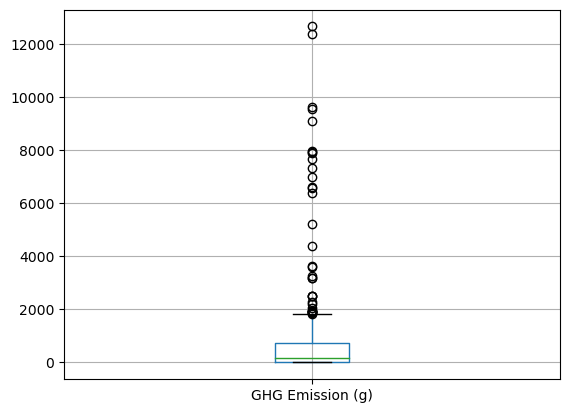

In [65]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [66]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [67]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [68]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

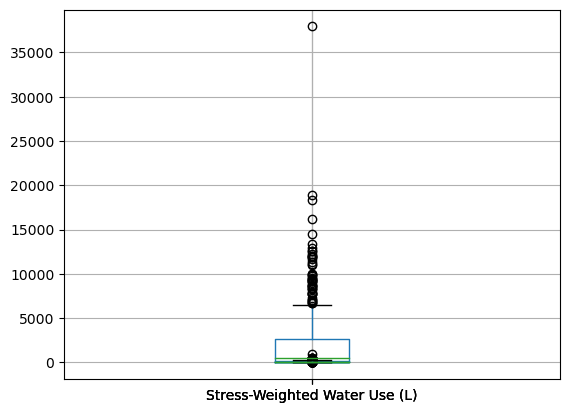

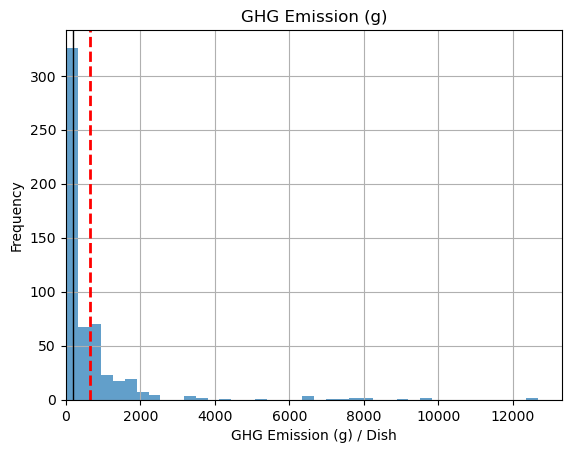

In [69]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

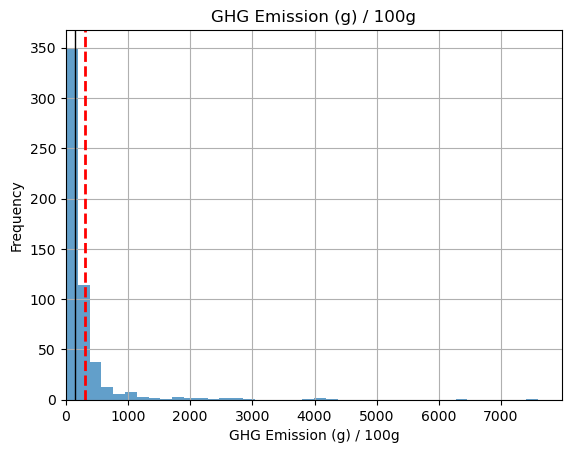

In [70]:
Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_100g.png')
plt.show()

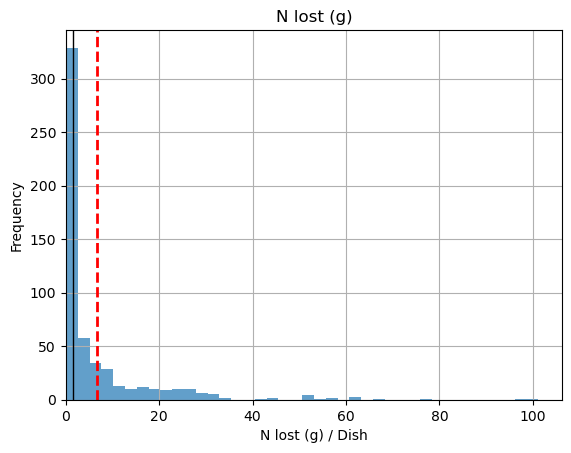

In [71]:
Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'N lost_dish.png')
plt.show()

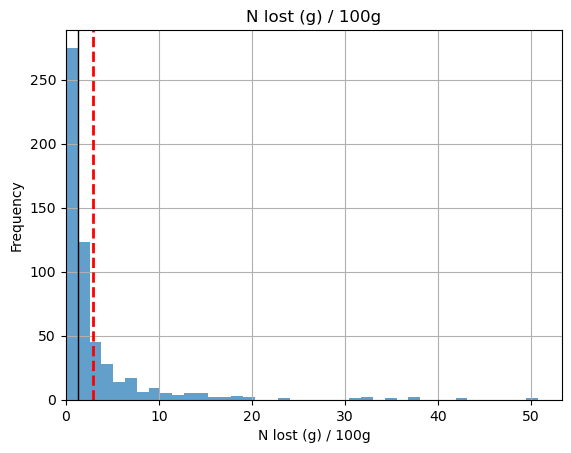

In [72]:
Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('N lost (g) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'N lost_100g.png')
plt.show()

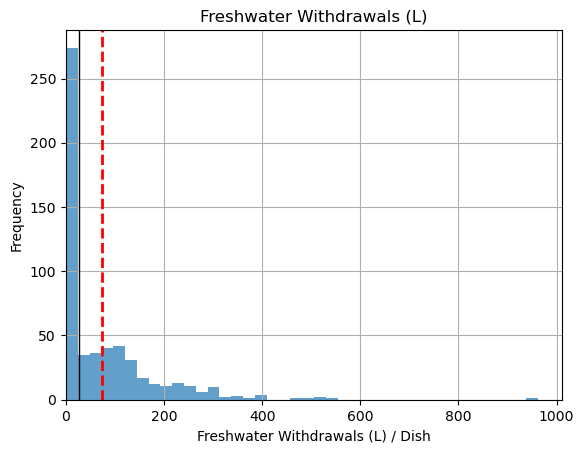

In [73]:
Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Freshwater Withdrawals (L) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Fresh water_dish.png')
plt.show()

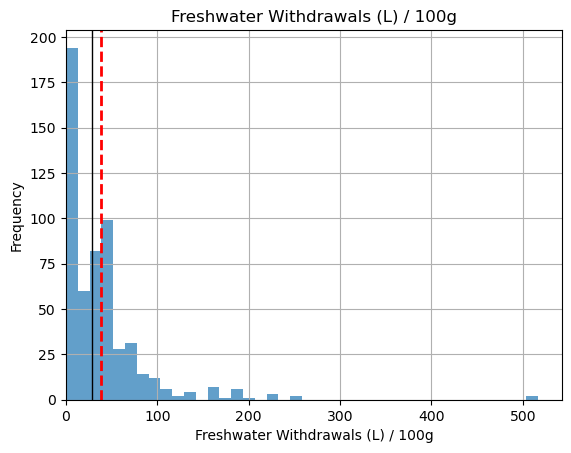

In [74]:
Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Freshwater Withdrawals (L) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Fresh water_100g.png')
plt.show()

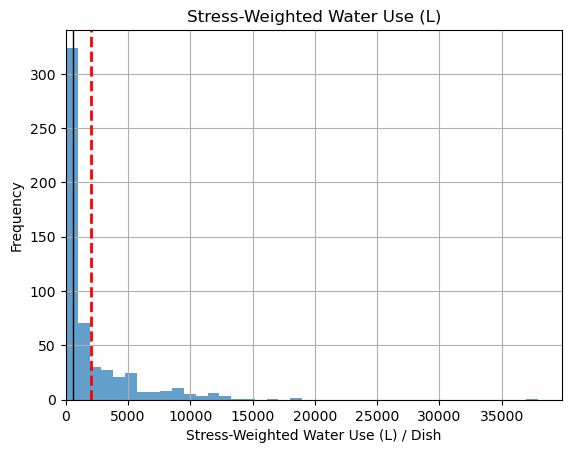

In [75]:
Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Stress-Weighted Water Use (L) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Stress water_dish.png')
plt.show()

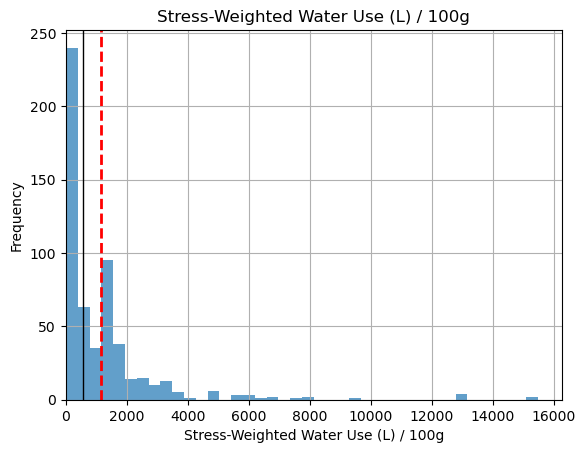

In [76]:
Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('Stress-Weighted Water Use (L) / 100g')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'Stress water_100g.png')
plt.show()

In [77]:
Products.to_csv('C:/Users/smvan/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)
